In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
#%matplotlib notebook

In [2]:
from IPython.display import display, HTML, Video
from matplotlib import animation

In [3]:
def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                       interval=20)
    anim.save('movie_cartpole.mp4')
    return HTML(anim.to_jshtml())

In [4]:
frames = []
env = gym.make('CartPole-v0')
observation = env.reset()

for step in range(0, 200):
    frames.append(env.render(mode='rgb_array'))
    action = np.random.choice(2)
    observation, reward, done, info = env.step(action)

/usr/lib/python3.9/site-packages/gym/logger.py:34: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


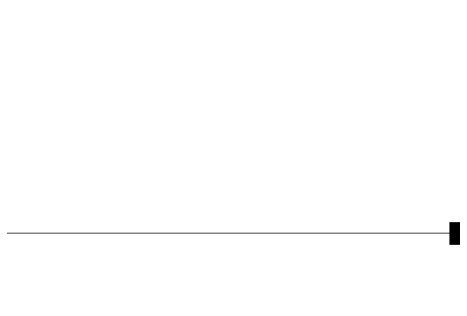

In [5]:
display_frames_as_gif(frames)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import gym

ENV = 'CartPole-v0'
NUM_DIZITZED = 6

env = gym.make(ENV)
observation = env.reset()

In [7]:
def bins(clip_min, clip_max, num):
    return np.linspace(clip_min, clip_max, num + 1)[1:-1]

In [8]:
def digitize_state(observation):
    cart_pos, cart_v, pole_angle, pole_v = observation
    digitized = [
        np.digitized(cart_pos, bins=bins(-2.4, 2.4, NUM_DIZITZED)),
        np.digitized(cart_v, bins=bins(-3.0, 3.0, NUM_DIZITZED)),
        np.digitized(pole_angle, bins=bins(-0.5, 0.5, NUM_DIZITZED)),
        np.digitized(pole_v, bins=bins(-2.0, 2.0, NUM_DIZITZED))
    ]
    return sum([x * (NUM_DIZITZED ** i) for i, x in enumerate(digitized)])

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from IPython.display import HTML
from matplotlib import animation

In [2]:
def display_frames_as_gif(frames):
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames),
                                       interval=50)
    anim.save('movie_cartpole.mp4')
    return HTML(anim.to_jshtml())

In [3]:
ENV = 'CartPole-v0'
NUM_DIZITZED = 6
GAMMA = 0.99
ETA = 0.5
MAX_STEPS = 200
NUM_EPISODES = 1000

In [4]:
class Agent:
    def __init__(self, num_states, num_actions):
        self.brain = Brain(num_states, num_actions)
        
    def update_Q_function(self, observation, action, reward, observation_next):
        self.brain.update_Q_table(observation, action, reward, observation_next)
        
    def get_action(self, observation, step):
        action = self.brain.decide_action(observation, step)
        return action

In [6]:
class Brain:
    def __init__(self, num_states, num_actions):
        self.num_actions = num_actions
        self.q_table = np.random.uniform(low=0, high=1,
                                         size=(NUM_DIZITZED**num_states, num_actions))
        
    def bins(self, clip_min, clip_max, num):
        return np.linspace(clip_min, clip_max, num + 1)[1:-1]
    
    def digitize_state(self, observation):
        cart_pos, cart_v, pole_angle, pole_v = observation
        digitized = [
            np.digitize(cart_pos, bins=self.bins(-2.4, 2.4, NUM_DIZITZED)),
            np.digitize(cart_v, bins=self.bins(-3.0, 3.0, NUM_DIZITZED)),
            np.digitize(pole_angle, bins=self.bins(-0.5, 0.5, NUM_DIZITZED)),
            np.digitize(pole_v, bins=self.bins(-2.0, 2.0, NUM_DIZITZED))
        ]
        return sum([x * (NUM_DIZITZED ** i) for i, x in enumerate(digitized)])
    
    def update_Q_table(self, observation, action, reward, observation_next):
        state = self.digitize_state(observation)
        state_next = self.digitize_state(observation_next)
        
        Max_Q_next = max(self.q_table[state_next][:])
        self.q_table[state, action] = self.q_table[state, action] + \
            ETA * (reward + GAMMA * MAX_Q_next - self.q_table[state, action])
        
    def decide_action(self, observation, episode):
        state = self.digitize_state(observation)
        epsilon = 0.5 * (1 / (episode + 1))
        
        if epsilon <= np.random.uniform(0, 1):
            action = np.argmax(self.q_table[state][:])
        else:
            action = np.random.choice(self.num_actions)
        return action